In [1782]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, odeint

##### Sistema de ecuaciones

$$
\frac{dy}{dt} = -k_{a}y,\hspace{5mm}k_{a} > 0
$$

$$
\frac{dx}{dt} = \frac{k_{a}}{V}y - k_{e}x, \hspace{5mm} k_{e} > 0
$$

Sistema resuelto

$$
\begin{equation}
    x\left(t\right) = \frac{k_a y_0}{V\left(k_a - k_e\right)}\left(e^{-k_e t} - e^{-k_a t}\right)
\end{equation}
$$
$$
\begin{equation}
    y_n\left(t\right) = y_0 \left(\frac{1 -\alpha^n}{1-\alpha}\right)e^{-k_a \left(t-\left(n-1\right)t_0\right)}
\end{equation}
$$

In [1783]:
# Modelo basado en la farmacocinética de la amoxacilina según los datos de:

# http://www.facmed.unam.mx/bmnd/gi_2k8/prods/PRODS/15.HTM#:~:text=FARMACOCINÉTICA%20Y%20FARMACODINAMIA%3A&text=Se%20absorbe%20rápidamente%20después%20de,AMOXICILINA%20es%20de%2061.3%20minutos.
# https://cima.aemps.es/cima/dochtml/ft/62459/FT_6245#:~:text=De%20250%20mg%20a%20500,al%20día%2C%20durante%20un%20día.&text=500%20mg%20cada%208%20horas%2C%20de%20750%20mg,1%20g%20cada%2012%20horas.
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC283758/#:~:text=The%20absorption%20rate%20constant%2C%20kappa,half-life%20was%200.72%20h.
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC283758/pdf/aac00382-0105.pdf
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC351932/pdf/aac00295-0140.pdf
# https://www.rxlist.com/amoxicillin-drug.htm#description

# FORMA FARMACÉUTICA Y FORMULACIÓN:

# Cada CÁPSULA contiene:

# Amoxicilina tetrahidratada
# equivalente a..............................250 y 500 mg
# de amoxicilina

# La administración de AMOXICILINA por vía oral en cápsulas con dosis de 250 y 500 mg, 
# alcanza un nivel sanguíneo máximo entre 1 y 2 horas después de la administración, en 
# un margen que va de 3.5 a 5.0 mcg/ml y de 5.5 a 7.5 mcg/ml, respectivamente.

# 1 microgramo/mililitro = 1 miligramo/litro

# Valores Iniciales
X0 = 0      # miligramo/L ; Es la dosis inicial del antibiótico en sangre
Y0 = 250    # miligramo ; Es la dosis inicial del antibiótico en estómago
Z0 = 0.2     # Densidad 

# Constantes
t0 = 8    # Horas
ka = 1.3    # horas^-1
ke = 1/8    # horas^-1
V = 5.5     # litros de sangre promedio según el rango de (3.5 - 6.0)
p = 0.95
# α = np.exp(-ka*t0)
α = 0.0215

# El tratamiento de amoxacilina consta de una pastilla de 500mg cada 8 horas
# por lo tanto el número de dosis o "n_dosis" del tratamiento total va a 
# calcularse multiplicando 3 (dosis por día) por el número de días.
n = 10      # Número de días que va a tomar el tratamiento
n_dosis = 3 * n # Número de dosis totales para el tratamiento completo.



In [1784]:
def model(c, t):
    y = c[0]
    x = c[1]
    dydt = -ka * y
    dxdt = ((ka / V) * y) - (ke * x)
    return np.array([dydt, dxdt])

step = 0.001
dosis_arr_2 = np.array([np.arange(i*t0, (i*t0) + t0, step) for i in range(n_dosis)])

t = np.arange(0, t0, step)
ysol = []
c0 = np.array([Y0, X0])

for i in range(len(dosis_arr_2)):
    ysol.append(odeint(model, c0, dosis_arr_2[i]))
    c0 = np.array([Y0 + ysol[-1][-1][0], X0 + ysol[-1][-1][1]])

t = np.concatenate(dosis_arr_2)
y = np.concatenate(ysol)[ : ,0]
x = np.concatenate(ysol)[ : ,1]

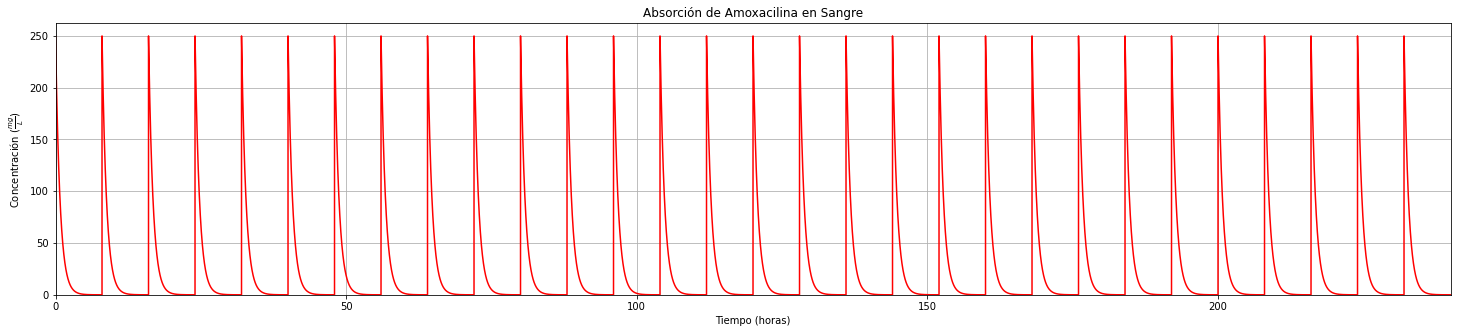

In [1785]:
fig, ax = plt.subplots(figsize=(25,5))
plt.plot(t, y, 'r', label='Concentración en sangre de amoxicilina')
plt.xlim(0, t0*n_dosis)

plt.ylim(0)
plt.xlabel('Tiempo (horas)')
plt.ylabel(r'Concentración ($\frac{mg}{L}$)')

plt.title('Absorción de Amoxacilina en Sangre')
plt.grid(True)

Text(0.5, 1.0, 'Modelo Simulado de Absorción de \nAmoxacilina en Sangre')

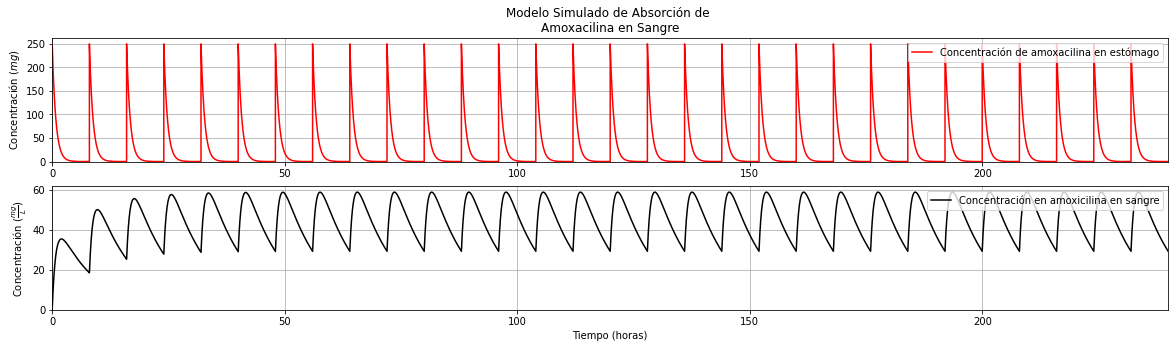

In [1786]:
figure, axis = plt.subplots(2, 1, figsize=(20,5))
axis[0].plot(t, y, 'r', label='Concentración de amoxacilina en estómago')
axis[1].plot(t, x, 'k', label='Concentración en amoxicilina en sangre')

axis[0].grid(True)
axis[1].grid(True)

axis[0].set_xlim(0, t0*n_dosis)
axis[0].set_ylim(0)

axis[1].set_xlim(0, t0*n_dosis)
axis[1].set_ylim(0)

axis[1].set_xlabel('Tiempo (horas)')

axis[0].set_ylabel(r'Concentración $(mg)$')
axis[1].set_ylabel(r'Concentración $(\frac{mg}{L})$')

axis[0].legend(loc=1)
axis[1].legend(loc=1)

axis[0].set_title('Modelo Simulado de Absorción de \nAmoxacilina en Sangre')

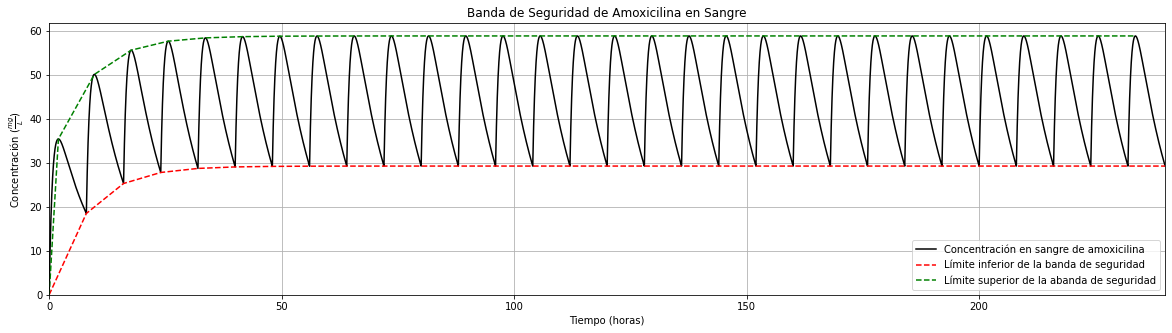

In [1787]:
ll = np.concatenate([x[np.where(t == dosis_arr_2[i][-1] if i >= 0 else t == 0.)] for i in range(-1, len(dosis_arr_2))])
lt = np.concatenate([t[np.where(t == dosis_arr_2[i][-1] if i >= 0 else t == 0.)] for i in range(-1, len(dosis_arr_2))])

hl = np.append(np.array([np.max(x[len(dosis_arr_2) * i: (len(dosis_arr_2[i]) * i) + 1 ]) for i in range(0, len(dosis_arr_2))]), np.max(x[:-len(dosis_arr_2)]))
ht = np.concatenate([t[np.where(x == hl[i])] for i in range(len(hl))])
tt = np.mean([ht, lt], axis=0)

fig, ax = plt.subplots(figsize=(20,5))
plt.plot(t, x, 'k', label='Concentración en sangre de amoxicilina')
plt.plot(lt,ll, '--', color='red', label='Límite inferior de la banda de seguridad')
plt.plot(ht, hl, '--', color='green', label='Límite superior de la abanda de seguridad')
plt.xlim(0, t0*n_dosis)
plt.ylim(0)
plt.xlabel('Tiempo (horas)')
plt.ylabel(r'Concentración ($\frac{mg}{L}$)')
plt.title('Banda de Seguridad de Amoxicilina en Sangre')
plt.grid(True)
plt.legend(loc='best')

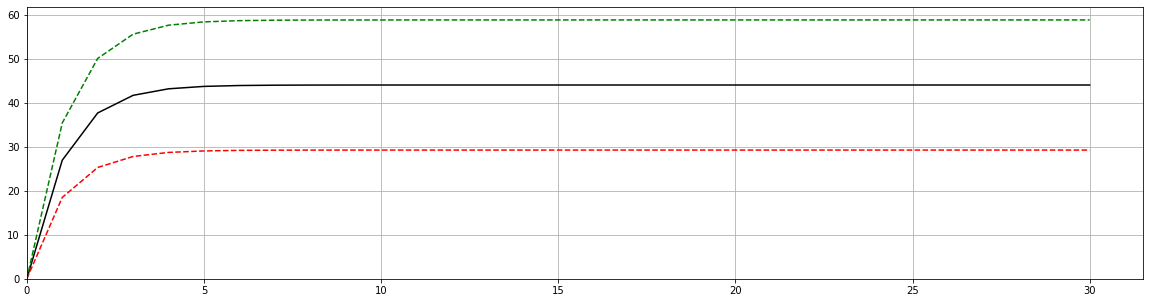

In [1788]:
fig, ax = plt.subplots(figsize=(20,5))
safe_mean = np.mean([hl, ll], axis=0)
plt.plot(safe_mean, 'k')
plt.plot(ll, 'r--')
plt.plot(hl, 'g--')
plt.ylim(0)
plt.xlim(0)
plt.grid(True)

<center> <h4> Crecimiento Bacteriano </h4> </center>

<center> <h7>Una vez establecido el modelo simulado agregamos una nueva ecuación la cual tiene como objetivo representar el <br>
crecimiento bacteriano en términos de densidad. Por lo tanto tenemos que: </h7> </center>

$$
\frac{dz}{dt} = pz(1 - z) - \alpha xz
$$

In [1789]:
dosis_desc = 14
ycsol = []
c0_c = np.array([Y0, X0, Z0])
dosis_arr_3 = np.array([np.arange(i*t0, (i*t0) + t0, step) for i in range(n_dosis)])

def complex_model(c, t):
    y = c[0]
    x = c[1]
    z = c[2]
    dydt = -ka * y
    dxdt = ((ka / V) * y) - (ke * x)
    dzdt = p*z*(1 - z) - (α*x*z)
    return np.array([dydt, dxdt, dzdt])

for i in range(len(dosis_arr_3)):
    ycsol.append(odeint(complex_model, c0_c, dosis_arr_3[i]))
    c0_c = np.array([Y0 + ycsol[-1][-1][0], X0 + ycsol[-1][-1][1], ycsol[-1][-1][2]])
    
    if ycsol[-1][-1][2] < 1*pow(10,-3):
        ycsol[-1][-1][2] = 0
        
    if i >= dosis_desc:
        c0_c = np.array([ycsol[-1][-1][0], X0 + ycsol[-1][-1][1], ycsol[-1][-1][2]])

In [1790]:
tz = np.concatenate(dosis_arr_3)
yz = np.concatenate(ycsol)[ : ,0]
xz = np.concatenate(ycsol)[ : ,1]
zz = np.concatenate(ycsol)[ : ,2]

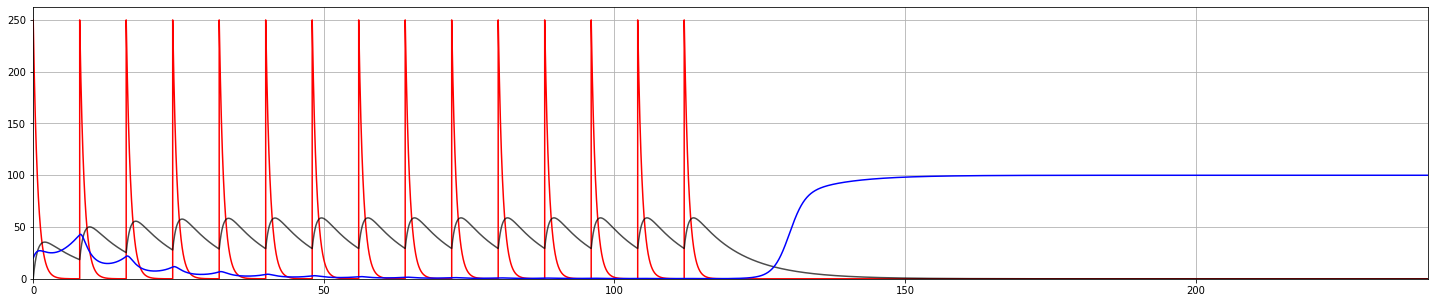

In [1791]:
fig, ax = plt.subplots(figsize=(25,5))
plt.plot(tz, yz, 'red')
plt.plot( tz, xz, 'black', alpha=0.7)
plt.plot( tz, zz*100, 'blue')
plt.xlim(0, n_dosis*t0)
plt.ylim(0)
plt.grid(True)
# plt.yscale('log')

In [1792]:
dosis_desc = 21
ycsol_m = []
c0_c_m = np.array([Y0, X0, Z0])
dosis_arr_3_m = np.array([np.arange(i*t0, (i*t0) + t0, step) for i in range(n_dosis)])

def complex_model(c, t):
    y = c[0]
    x = c[1]
    z = c[2]
    dydt = -ka * y
    dxdt = ((ka / V) * y) - (ke * x)
    dzdt = p*z*(1 - z) - (α*x*z)
    return np.array([dydt, dxdt, dzdt])

for i in range(len(dosis_arr_3_m)):
    ycsol_m.append(odeint(complex_model, c0_c_m, dosis_arr_3_m[i]))
    c0_c_m = np.array([Y0 + ycsol_m[-1][-1][0], X0 + ycsol_m[-1][-1][1], ycsol_m[-1][-1][2]])
    
    if ycsol_m[-1][-1][2] < 1*pow(10,-3):
        ycsol_m[-1][-1][2] = 0

    if i >= dosis_desc:
        c0_c_m = np.array([ycsol_m[-1][-1][0], X0 + ycsol_m[-1][-1][1], ycsol_m[-1][-1][2]])

In [1793]:
tz_m = np.concatenate(dosis_arr_3_m)
yz_m = np.concatenate(ycsol_m)[ : ,0]
xz_m = np.concatenate(ycsol_m)[ : ,1]
zz_m = np.concatenate(ycsol_m)[ : ,2]

Text(0.5, 0.98, 'Persistencia bacteriana')

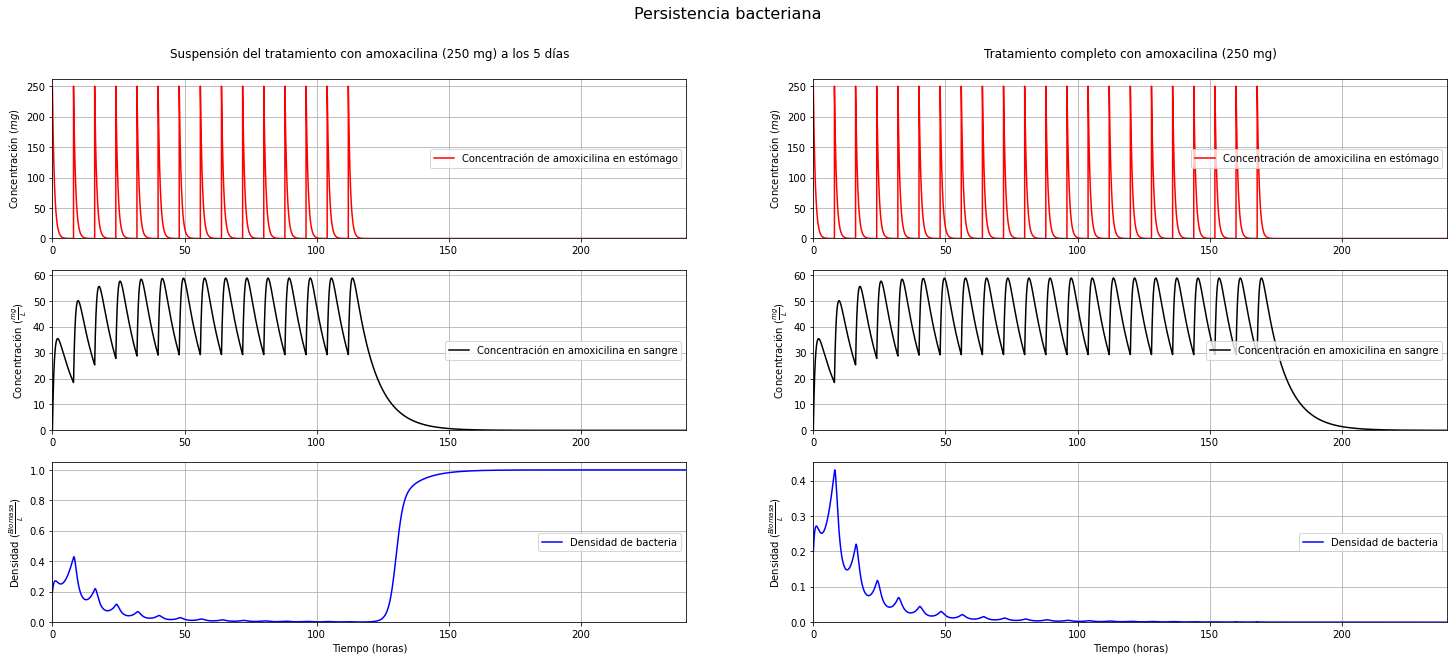

In [1797]:
figure, axis = plt.subplots(3, 2, figsize=(25,10))

axis[0, 0].plot(tz, yz, color='red', label='Concentración de amoxicilina en estómago')
axis[1, 0].plot(tz, xz, color='black', label='Concentración en amoxicilina en sangre')
axis[2, 0].plot(tz, zz, color='blue' , label='Densidad de bacteria')


axis[0, 1].plot(tz, yz_m, color='red', label='Concentración de amoxicilina en estómago')
axis[1, 1].plot(tz, xz_m, color='black', label='Concentración en amoxicilina en sangre')
axis[2, 1].plot(tz, zz_m, color='blue', label='Densidad de bacteria')

# Setting grid and limits
[axis[k, 0].grid(True) for k in range(len(axis))];
[axis[k, 0].set_xlim(0, n_dosis*t0) for k in range(len(axis))];
[axis[k, 0].set_ylim(0) for k in range(len(axis))];
[axis[k, 0].legend(loc=5) for k in range(len(axis))];

# Setting grid and limits
[axis[k, 1].grid(True) for k in range(len(axis))];
[axis[k, 1].set_xlim(0, n_dosis*t0) for k in range(len(axis))];
[axis[k, 1].set_ylim(0) for k in range(len(axis))];
[axis[k, 1].legend(loc=5) for k in range(len(axis))];

# Setting X Labels
axis[2, 0].set_xlabel('Tiempo (horas)\n');
axis[2, 1].set_xlabel('Tiempo (horas)\n');

#Setting Y Labels
axis[0, 0].set_ylabel(r'Concentración $(mg)$')
axis[1, 0].set_ylabel(r'Concentración $(\frac{mg}{L})$')
axis[2, 0].set_ylabel(r'Densidad ($\frac{Biomasa}{L}$)')
axis[0, 1].set_ylabel(r'Concentración $(mg)$')
axis[1, 1].set_ylabel(r'Concentración $(\frac{mg}{L})$')
axis[2, 1].set_ylabel(r'Densidad ($\frac{Biomasa}{L}$)')

# Setting titles
axis[0, 0].set_title('\nSuspensión del tratamiento con amoxacilina (250 mg) a los 5 días\n')
axis[0, 1].set_title('\nTratamiento completo con amoxacilina (250 mg)\n')

# Setting main title
figure.suptitle('Persistencia bacteriana', fontsize=16)